In [38]:
import torch
import torchvision

from torch.utils.data import DataLoader, Dataset
import torch
from torchvision import datasets, transforms
import torchvision.transforms as T
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random

from numpy import asarray

from PIL import Image
import glob

import os

In [42]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

image_list = []
for filename in glob.glob('./datasets/Alzheimers_Data/*.jpg'): #assuming gif
    im=Image.open(filename)
    data = asarray(im)
    image_list.append(data)
    im.close()

image_list
# image_size = 64
# DATA_DIR = './datasets/Alzheimers_Data'
# X_train = np.load(DATA_DIR)
# print(f"Shape of training data: {X_train.shape}")
# print(f"Data type: {type(X_train)}")



# trainset = torchvision.datasets.CIFAR10(root='./datasets/Alzheimers_Data', train=True,
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./datasets/Alzheimers_Data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
#                                          shuffle=False, num_workers=2)

# classes = ('Mild','Moderate','Non','VeryMild')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

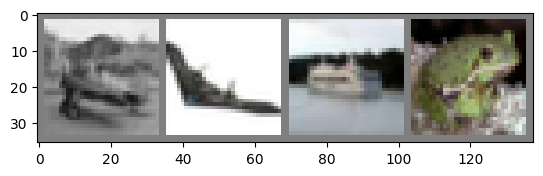

IndexError: tuple index out of range

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))